To start working with CSV data in Numpy and Pandas, we first need to start by importing the libraries into our Python environment. By convention, Numpy is aslways imported with np as its alias name and Pandas is always imported with pd as its alias name.

We also need to import the Pyplot methods from Matplotlib library along with the seaborn library to create Data Visualizations. But before importing the matplotlib library, we need to run a magic command "%matplotlib inline" for being able to display the plots inline.

In [152]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

We use the pd.read_csv(filename,delimiter) to read the csv file as a Pandas Dataframe. The Pandas Dataframe is a 2-Dimensional data structure i.e data is aligned in a tabular fashion in rows and columns.

In [153]:
unrate = pd.read_csv('D:\\Setups\\Darshit\\Studies\\DataQuest\\2. Data Analysis & Visualization\\Projects\\Unemployment Rate\\unrate.csv')

# We print the first few rows of the dataframe to understand its structure
unrate.head()

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [154]:
# Exploring the data set with the help of info() method which gives us an overview of all the dtypes used in our datafrane, along with its shape and some extra information
unrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 2 columns):
DATE     824 non-null object
VALUE    824 non-null float64
dtypes: float64(1), object(1)
memory usage: 13.0+ KB


In [155]:
# Converting the DAT Ecolumn to type datetime

unrate['DATE'] = pd.to_datetime(unrate['DATE'])

The data contains particular months and year and the unemployment rate as a percent in that month. This is still not read as a TimeSeries as the DATE column is of object type.

In order to read the data as a time series, we have to pass special arguments to the read_csv command

In [156]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
unrate_new = pd.read_csv('D:\\Setups\\Darshit\\Studies\\DataQuest\\2. Data Analysis & Visualization\\Projects\\Unemployment Rate\\unrate.csv', parse_dates=['DATE'], index_col='DATE',date_parser=dateparse)

In [157]:
# The data has Time object as index and the value as the column. We can cross-check the datatype of the index with the following command
unrate_new.index

DatetimeIndex(['1948-01-01', '1948-02-01', '1948-03-01', '1948-04-01',
               '1948-05-01', '1948-06-01', '1948-07-01', '1948-08-01',
               '1948-09-01', '1948-10-01',
               ...
               '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01',
               '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
               '2016-07-01', '2016-08-01'],
              dtype='datetime64[ns]', name='DATE', length=824, freq=None)

We first understand if there is any seasonality by comparing the unemployment trends across the years so we can decide if we should investigate further. We simply plot the data to analyze trends using the below command

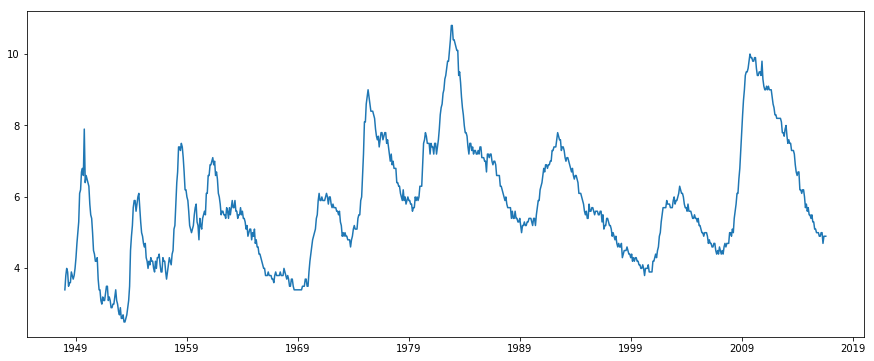

In [158]:
plt.plot(unrate_new)

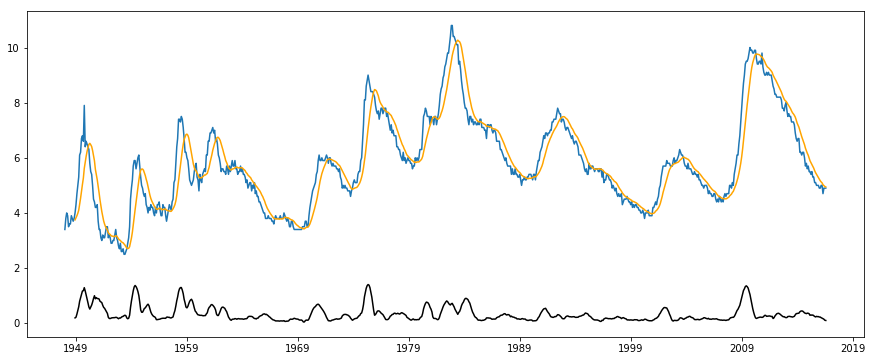

In [159]:
from statsmodels.tsa.stattools import adfuller

# Checking stationariy of the time series by plotting rolling mean and rolling std using the function rolling(window size).mean() and rolling(window size).std()
rol_mean = unrate_new.rolling(12).mean()
rol_std = unrate_new.rolling(12).std()

org = plt.plot(unrate_new, label = 'Original')
mean = plt.plot(rol_mean, color = 'orange', label = 'Rolling Mean')
std = plt.plot(rol_std, color = 'black', label = 'Rolling STD')

plt.show()

# Checking stationarity of the time series by performing Dickey-Fuller test
#print('Results of Dickey-Fuller Test:')
#dftest = adfuller(unrate, autolag='AIC')
#dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#for key,value in dftest[4].items():
#    dfoutput['Critical Value (%s)'%key] = value
#print(dfoutput)

The 2 major reasons behind non-stationarity of a time series are Trend and Seasonality. Th eunderlying principle is to model or estimate the trend and seasonality in the series and remove those from the series to get a stationary series and then apply statistical forecasting techniques on the time series

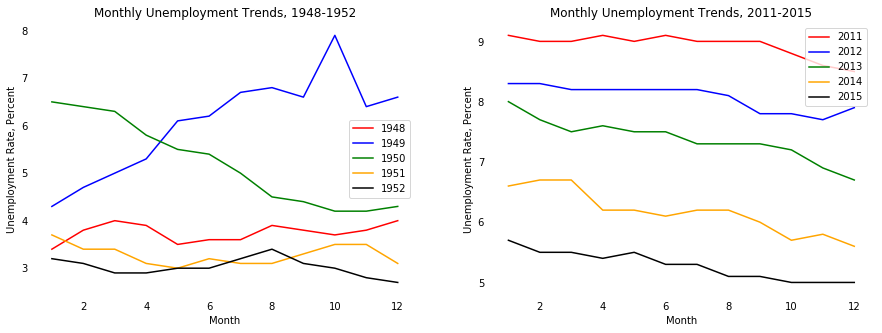

In [160]:
# Lets understand the unemployment trends in the first 5 years (1948-1952) and the last 5 years (2011-2016) of the dataset
colors = ['red', 'blue', 'green', 'orange', 'black']
unrate['MONTH'] = unrate['DATE'].dt.month

fig = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(1,2,1)

for i in range(5):
    start_index = i * 12
    end_index = (i + 1) * 12
    subset = unrate[start_index:end_index]
    ax1.plot(subset['MONTH'], subset['VALUE'], label = str(1948 + i), c = colors[i])
    
ax1.set_title('Monthly Unemployment Trends, 1948-1952')
ax1.set_xlabel('Month')
ax1.set_ylabel('Unemployment Rate, Percent')
ax1.legend(loc = 'best')
ax1.tick_params(bottom = False, left = False, top = False, right = False)

ax2 = fig.add_subplot(1,2,2)
subset = unrate[-68:]

for i in range(5):
    start_index = i * 12
    end_index = (i + 1) * 12
    temp = subset[start_index:end_index]
    ax2.plot(temp['MONTH'], temp['VALUE'], label = str(2011 + i), c = colors[i])
    
ax2.set_title('Monthly Unemployment Trends, 2011-2015')
ax2.set_xlabel('Month')
ax2.set_ylabel('Unemployment Rate, Percent')
ax2.legend(loc = 'best')

ax2.tick_params(bottom = False, left = False, top = False, right = False)
sns.despine(bottom = True, left = True)
    
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


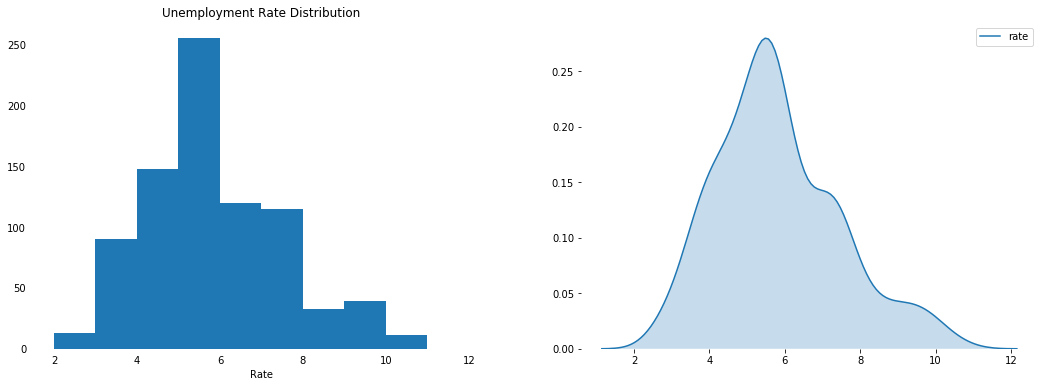

In [161]:
# Understanding the distribution of Unemployment Rate throughout the data i.e during the entire time period and plotting a histogram and KDE

# Creating a figure object and setting the size of the figure
fig = plt.figure(figsize=(18,6))

# Creating an axes object and adding a subplot in the figure container.
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# Plotting a histogram to show the distribution of unemployment rate
ax1.hist(unrate['VALUE'], bins = 10, range = (2,12))
ax1.set_title('Unemployment Rate Distribution')
ax1.set_xlabel('Rate')
ax1.tick_params(bottom = False, left = False, top = False, right = False)

# Plotting a KDE to explore the estimate density of unemployment rate
ax2 = sns.kdeplot(unrate['VALUE'], shade = True, label = "rate")

sns.despine(bottom=True, left=True)

plt.show()